# QA4U lecture 2

## probs can be solved by QA
due to the QA machine property, it can only solve the probs be represented in ***quadratic function*** with a ***QUBO matrix*** and ***binary variables***.

\begin{equation}
E({\bf x}) = \sum_{i=1}^N \sum_{j=1}^N Q_{ij} x_i x_j
\end{equation}

## dealing with interger data type in QA
A Qbit can only represent either 0 or 1. To dealing with an interger variable larger than 1, that variable can be represented as 
$$x = \sum_{i=1}^N x_i$$

Lets assume a function
$$y = a(x-b)^2$$
and represent the variable, $x$, in Qbits

\begin{align}
y &= a(\sum_{i=1}^N x_i - b)^2\\
&= a \sum_{i=1}^N \sum_{j=1}^N x_ix_j - 2ab \sum_{i=1}^N x_i + ab^2
\end{align}

Similarly as previous, we obtain the QUBO matrix here

In [1]:
import numpy as np
N = 10
QUBO = np.zeros(N**2).reshape(N, N)

In [2]:
a = 0.5
b = 3

# first item
for i in range(N):
    for j in range(N):
        QUBO[i][j] = a

# second item
for i in range(N):
    QUBO[i][i] -= 2*a*b

In [3]:
# conver array into dict for simulator
def array2dict(Q):
    Qdict = {}
    for i in range(Q.shape[0]):
        for j in range(Q.shape[1]):
            Qdict[(i,j)] = Q[i][j]
    return Qdict

In [4]:
QUBOdict = array2dict(QUBO)

In [5]:
from openjij import SQASampler
sim_sampler = SQASampler()

sampleset = sim_sampler.sample_qubo(QUBOdict, num_reads=10)
print(sampleset.record)
print(sampleset.first)

[([1, 0, 0, 0, 0, 1, 0, 0, 1, 0], -4.5, 1)
 ([1, 0, 0, 1, 0, 1, 0, 0, 0, 0], -4.5, 1)
 ([1, 1, 0, 0, 0, 0, 0, 0, 0, 1], -4.5, 1)
 ([1, 0, 1, 0, 0, 0, 0, 1, 0, 0], -4.5, 1)
 ([0, 1, 0, 1, 1, 0, 0, 0, 1, 0], -4. , 1)
 ([1, 0, 0, 1, 0, 0, 0, 0, 0, 1], -4.5, 1)
 ([0, 0, 1, 0, 1, 0, 0, 0, 0, 1], -4.5, 1)
 ([0, 0, 1, 0, 0, 0, 0, 0, 0, 1], -4. , 1)
 ([1, 0, 1, 1, 0, 0, 0, 0, 1, 0], -4. , 1)
 ([0, 0, 1, 0, 1, 1, 0, 0, 0, 0], -4.5, 1)]
Sample(sample={0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 1, 9: 0}, energy=-4.5, num_occurrences=1)


theoretically, the min value of the function, $y = 0.5*(x-3)^2$, occurs when $x = 3$. thus, there should exist 3 $x$s as the value of 1 in results. the remaining energy of 4.5 can be considered as the constant item, $ab^2$ in the equation

## pyQUBO: obtain QUBO matrix from equations
pyQUBO lib is in D-WAVE Ocean SDK

In [6]:
from pyqubo import Array

# binary variable
x = Array.create(name = 'x', shape = (N), vartype = 'BINARY')
print(x)

Array([Binary(x[0]), Binary(x[1]), Binary(x[2]), Binary(x[3]), Binary(x[4]), Binary(x[5]), Binary(x[6]), Binary(x[7]), Binary(x[8]), Binary(x[9])])


In [7]:
# function equation
y = a * (sum(x)-b)**2

In [8]:
# from function to qubo
model = y.compile()
qubo, offset = model.to_qubo()
print(qubo)

{('x[8]', 'x[8]'): -2.5, ('x[7]', 'x[7]'): -2.5, ('x[1]', 'x[1]'): -2.5, ('x[0]', 'x[0]'): -2.5, ('x[4]', 'x[4]'): -2.5, ('x[2]', 'x[2]'): -2.5, ('x[8]', 'x[2]'): 1.0, ('x[6]', 'x[2]'): 1.0, ('x[8]', 'x[1]'): 1.0, ('x[8]', 'x[0]'): 1.0, ('x[2]', 'x[0]'): 1.0, ('x[8]', 'x[5]'): 1.0, ('x[7]', 'x[5]'): 1.0, ('x[7]', 'x[1]'): 1.0, ('x[0]', 'x[1]'): 1.0, ('x[9]', 'x[7]'): 1.0, ('x[9]', 'x[6]'): 1.0, ('x[7]', 'x[4]'): 1.0, ('x[3]', 'x[2]'): 1.0, ('x[7]', 'x[2]'): 1.0, ('x[8]', 'x[6]'): 1.0, ('x[4]', 'x[2]'): 1.0, ('x[5]', 'x[4]'): 1.0, ('x[3]', 'x[0]'): 1.0, ('x[3]', 'x[3]'): -2.5, ('x[4]', 'x[3]'): 1.0, ('x[9]', 'x[0]'): 1.0, ('x[6]', 'x[1]'): 1.0, ('x[7]', 'x[3]'): 1.0, ('x[6]', 'x[0]'): 1.0, ('x[8]', 'x[3]'): 1.0, ('x[6]', 'x[4]'): 1.0, ('x[3]', 'x[1]'): 1.0, ('x[9]', 'x[2]'): 1.0, ('x[5]', 'x[0]'): 1.0, ('x[2]', 'x[1]'): 1.0, ('x[5]', 'x[5]'): -2.5, ('x[9]', 'x[8]'): 1.0, ('x[9]', 'x[3]'): 1.0, ('x[5]', 'x[2]'): 1.0, ('x[6]', 'x[5]'): 1.0, ('x[6]', 'x[6]'): -2.5, ('x[4]', 'x[0]'): 1.0, (

In [9]:
sampleset = sim_sampler.sample_qubo(qubo, num_reads=10)
print(sampleset.record)
print(sampleset.first)

[([1, 1, 0, 0, 1, 0, 0, 0, 0, 0], -4.5, 1)
 ([0, 0, 1, 1, 1, 0, 0, 0, 0, 0], -4.5, 1)
 ([0, 0, 0, 0, 1, 0, 0, 1, 0, 1], -4.5, 1)
 ([0, 0, 1, 1, 1, 0, 0, 0, 0, 0], -4.5, 1)
 ([0, 1, 0, 0, 0, 0, 0, 0, 1, 1], -4.5, 1)
 ([1, 0, 1, 1, 0, 0, 0, 1, 0, 0], -4. , 1)
 ([1, 0, 0, 0, 1, 0, 0, 1, 0, 0], -4.5, 1)
 ([0, 0, 1, 0, 0, 1, 0, 1, 1, 0], -4. , 1)
 ([1, 1, 0, 1, 0, 0, 0, 0, 0, 0], -4.5, 1)
 ([1, 0, 0, 0, 0, 0, 1, 1, 0, 0], -4.5, 1)]
Sample(sample={'x[0]': 1, 'x[1]': 1, 'x[2]': 0, 'x[3]': 0, 'x[4]': 1, 'x[5]': 0, 'x[6]': 0, 'x[7]': 0, 'x[8]': 0, 'x[9]': 0}, energy=-4.5, num_occurrences=1)


In [10]:
print(offset)

4.5


now we got the same result as previous section that the QUBO was established manually

## penalty
in the case to have some constraints on $x$, for example, to ensure the sum of $x$ equals to the value of $b$, we can establish the cost function as
$$E(x) = \frac{a}{2}(\sum_{i=1}^N x_i -b)^2$$
Such method that set constraints on the vertex is called Penalty.

### example
knapsack prob with a certain number of objects, $K=3$

In [11]:
# random weights for 10 objects
N = 10
w = np.random.rand(N)
print(w)

[0.72427187 0.79864384 0.87487621 0.95846411 0.70483845 0.03394692
 0.48437741 0.08352743 0.59210616 0.64683782]


In [12]:
x = Array.create(name = 'x', shape = N, vartype = 'BINARY')

In [13]:
K = 3
constr = (sum(x) - K) ** 2

QA mainly solves min probs. in the case to obtain max value, apply a minus sign to the equation, such as
$$E(x) = -\sum_{i=1}^N w_i x_i + a(\sum_{i=1}^N x_i - K)^2$$

In [14]:
cost = - np.dot(w, x)
cost

(Binary(x[9])*Num(0.646838)+Binary(x[8])*Num(0.592106)+Binary(x[7])*Num(0.083527)+Binary(x[6])*Num(0.484377)+Binary(x[5])*Num(0.033947)+Binary(x[4])*Num(0.704838)+Binary(x[3])*Num(0.958464)+Binary(x[2])*Num(0.874876)+Binary(x[0])*Num(0.724272)+Binary(x[1])*Num(0.798644))*Num(-1.000000)

In [15]:
cost = 0
cost

0

In [16]:
for i in range(N):
    cost = cost - w[i] * x[i]
cost

((((((((((Binary(x[0])*Num(0.724272)*Num(-1.000000)+Num(0.000000))+Binary(x[1])*Num(0.798644)*Num(-1.000000))+Binary(x[2])*Num(0.874876)*Num(-1.000000))+Binary(x[3])*Num(0.958464)*Num(-1.000000))+Binary(x[4])*Num(0.704838)*Num(-1.000000))+Binary(x[5])*Num(0.033947)*Num(-1.000000))+Binary(x[6])*Num(0.484377)*Num(-1.000000))+Binary(x[7])*Num(0.083527)*Num(-1.000000))+Binary(x[8])*Num(0.592106)*Num(-1.000000))+Binary(x[9])*Num(0.646838)*Num(-1.000000))

pyqubo has powerful modules for penalty.
- placeholder enables to change the coef later while saving execution time

In [17]:
from pyqubo import Constraint, Placeholder
cost_func = cost + Placeholder('a')*Constraint(constr, label='one-hot')

In [18]:
model = cost_func.compile()

In [19]:
feed_dict = {'a': 2.0}
qubo, offset = model.to_qubo(feed_dict=feed_dict)

In [20]:
sampleset = sim_sampler.sample_qubo(qubo, num_reads=10)
print(sampleset.record)
print(sampleset.first)

[([0, 1, 1, 0, 0, 0, 0, 0, 0, 1], -20.32035788, 1)
 ([0, 1, 1, 0, 0, 0, 0, 0, 0, 1], -20.32035788, 1)
 ([0, 0, 1, 1, 0, 0, 0, 0, 1, 0], -20.42544649, 1)
 ([1, 0, 1, 0, 0, 0, 0, 0, 1, 0], -20.19125425, 1)
 ([1, 0, 0, 0, 0, 0, 0, 0, 1, 1], -19.96321586, 1)
 ([0, 0, 0, 1, 0, 0, 0, 0, 1, 1], -20.1974081 , 1)
 ([1, 0, 0, 1, 0, 0, 0, 0, 0, 1], -20.32957381, 1)
 ([1, 0, 1, 1, 0, 0, 0, 0, 0, 0], -20.5576122 , 1)
 ([0, 1, 0, 1, 0, 0, 0, 0, 0, 1], -20.40394578, 1)
 ([0, 0, 0, 1, 1, 0, 1, 0, 0, 0], -20.14767997, 1)]
Sample(sample={'x[0]': 1, 'x[1]': 0, 'x[2]': 1, 'x[3]': 1, 'x[4]': 0, 'x[5]': 0, 'x[6]': 0, 'x[7]': 0, 'x[8]': 0, 'x[9]': 0}, energy=-20.55761219824865, num_occurrences=1)


<span style="color:orange">sampleset.first</span> tells the result giving the min energy

to check whether the sampleset satisfies the constraints
- <span style="color:orange">.constraints(only_broken=True)</span> gives the sample sets do not satisify

In [21]:
decoded_samples = model.decode_sampleset(sampleset = sampleset, feed_dict = feed_dict)

for sample in decoded_samples:
    print(sample.constraints(only_broken=True))

{}
{}
{}
{}
{}
{}
{}
{}
{}
{}


## probs should be solved by QA
to be more closer to the real-world situation regarding knapsack, we can assume whether two objects are good to be carried togeter. $W_{ij}$ tells how easily / hardly to carry two objects togther

In [22]:
W = 0.1 * np.random.rand(N**2).reshape(N,N)
W -= np.diag(np.diag(W))
print(W)

[[0.         0.09188929 0.04452233 0.00744838 0.09829124 0.02708858
  0.09205573 0.08862633 0.06711644 0.09410196]
 [0.09923829 0.         0.05856805 0.0822032  0.0461632  0.0070787
  0.08903944 0.07666588 0.03808293 0.08388994]
 [0.07160536 0.09444941 0.         0.02611818 0.0463549  0.00588307
  0.04092306 0.09658804 0.04176903 0.08008022]
 [0.00053115 0.008784   0.08429758 0.         0.09926344 0.02297686
  0.0084391  0.06236501 0.0609252  0.09083209]
 [0.04828415 0.03232349 0.09727692 0.06879434 0.         0.00347678
  0.02025279 0.05146051 0.02625001 0.07979555]
 [0.0517856  0.00065238 0.06048448 0.00944295 0.07468007 0.
  0.06853585 0.00489869 0.06027949 0.07649884]
 [0.06663138 0.03737164 0.0740838  0.03943447 0.0757079  0.05255125
  0.         0.05381951 0.09684764 0.05230036]
 [0.0568156  0.04320142 0.04058352 0.09316643 0.09351602 0.01057044
  0.05048288 0.         0.04805395 0.01479481]
 [0.0640049  0.00590103 0.0285703  0.01405417 0.007356   0.00702645
  0.000577   0.012856

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-w_w__1uf because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


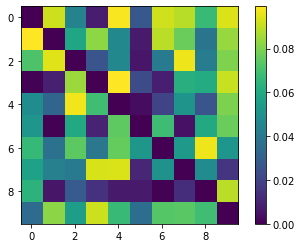

In [23]:
# visualization
import matplotlib.pyplot as plt
plt.imshow(W)
plt.colorbar()
plt.show()

In [24]:
# a new cost function
cost2 = 0
for i in range(N):
    for j in range(N):
        cost2 += W[i][j] * x[i] * x[j]

In [25]:
cost_func2 = cost + cost2 + Placeholder('a')*Constraint(constr, label='Kconstr')
model2 = cost_func2.compile()
feed_dict = {'a': 2.0}
qubo2, offset = model2.to_qubo(feed_dict=feed_dict)

In [26]:
sampleset = sim_sampler.sample_qubo(qubo2, num_reads=10)
print(sampleset.record)
print(sampleset.first)

[([0, 1, 0, 1, 0, 0, 0, 0, 0, 1], -19.96453903, 1)
 ([1, 0, 0, 1, 1, 0, 0, 0, 0, 0], -20.06496173, 1)
 ([0, 0, 1, 1, 0, 0, 0, 0, 1, 0], -20.16971203, 1)
 ([1, 0, 0, 1, 1, 0, 0, 0, 0, 0], -20.06496173, 1)
 ([1, 0, 0, 1, 0, 0, 0, 0, 1, 0], -20.06076191, 1)
 ([1, 0, 0, 1, 0, 0, 0, 0, 0, 1], -20.01030558, 1)
 ([0, 0, 1, 0, 0, 0, 0, 0, 1, 1], -19.75008583, 1)
 ([1, 0, 0, 0, 1, 0, 1, 0, 0, 0], -19.51226454, 1)
 ([1, 1, 0, 1, 0, 0, 0, 0, 0, 0], -20.19128551, 1)
 ([0, 1, 0, 1, 0, 0, 0, 0, 1, 0], -20.13926359, 1)]
Sample(sample={'x[0]': 1, 'x[1]': 1, 'x[2]': 0, 'x[3]': 1, 'x[4]': 0, 'x[5]': 0, 'x[6]': 0, 'x[7]': 0, 'x[8]': 0, 'x[9]': 0}, energy=-20.191285512644818, num_occurrences=1)


the optimal solutions are different with higher min energy due to the new constraints

## Merton's portfolio problem
<span  style="color:orange">Def:</span> An investor must choose how much to consume and must allocate his wealth between stocks and a risk-free asset so as to maximize expected utility.

Lets use QA to solve this prob now

In [27]:
import datetime
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2020, 12, 31)

In [28]:
# 株の銘柄
stockcodes=["2502", "3382", "4661", "6178", "6758", "7203", "8053", "8604", "9020", "9433"]
## アサヒ, セブン&アイ, オリエンタルランド, 日本郵政, ソニー, トヨタ自動車, 住友商事, 野村ホールディングス, JR東日本, KDDI

In [29]:
#証券データの読み込みに利用するライブラリ
import pandas as pd
import pandas_datareader.stooq as stooq

rates = []
#for文で各証券コードについて処理を繰り返していく
for sc in stockcodes:  
  # f"{sc}.jp"で証券を指定して、start,endで始まりと終わりの時期を指定のうえ、.read()読み込みます。その中でも終値だけを知りたいので['Close']としました。
  df = stooq.StooqDailyReader(f"{sc}.jp", start, end).read()[['Close']]

  # pandasのデータフレーム形式で結果を得ることができます。その結果はsort_valuesで日付'Date'で昇順（小さい順）に並べています。
  df = df.sort_values(by='Date',ascending=True)
  
  #前日の終値と今日の終値を比較して、前日比を調べています。
  return_rate = np.zeros(len(df.values))
  for k in range(len(df.values)-1):
    return_rate[k+1] = (df.values[k+1][0] - df.values[k][0])/df.values[k][0]
  
  rates.append(return_rate)

rates tells the benefit ratio for each stock

In [30]:
N = len(stockcodes)

w = np.zeros(N)
for k in range(N):
  w[k] = rates[k].mean()

In [31]:
# same flow as previous
x = Array.create('x', shape=N, vartype='BINARY')

K = N//2
constr = (sum(x)-K)**2

cost = 0
for i in range(N):
  cost -= w[i]*x[i]

cost_func = cost + Placeholder('a')*Constraint(constr, label='Kconstr')
model = cost_func.compile()

max_coeff = np.max(abs(w))

feed_dict = {'a': 10.0*max_coeff}
qubo, offset = model.to_qubo(feed_dict=feed_dict)

In [32]:
sampleset = sim_sampler.sample_qubo(qubo, num_reads=10)
print(sampleset.record)
print(sampleset.first)

[([1, 1, 0, 1, 0, 1, 1, 0, 1, 0], -0.26730983, 1)
 ([0, 0, 0, 1, 0, 1, 0, 0, 1, 0], -0.23421769, 1)
 ([1, 1, 0, 1, 0, 1, 0, 0, 0, 0], -0.26801365, 1)
 ([0, 1, 0, 1, 0, 1, 0, 0, 0, 0], -0.23459363, 1)
 ([0, 1, 1, 1, 0, 1, 1, 1, 0, 1], -0.23551476, 1)
 ([0, 1, 1, 1, 1, 1, 0, 0, 1, 1], -0.23642286, 1)
 ([0, 0, 0, 0, 1, 0, 0, 1, 0, 1], -0.23626762, 1)
 ([0, 1, 0, 0, 1, 0, 1, 1, 0, 0], -0.26910775, 1)
 ([1, 1, 0, 0, 0, 1, 0, 1, 0, 1], -0.27994245, 1)
 ([1, 0, 0, 0, 0, 0, 0, 1, 0, 1], -0.23501929, 1)]
Sample(sample={'x[0]': 1, 'x[1]': 1, 'x[2]': 0, 'x[3]': 0, 'x[4]': 0, 'x[5]': 1, 'x[6]': 0, 'x[7]': 1, 'x[8]': 0, 'x[9]': 1}, energy=-0.279942449254305, num_occurrences=1)


### Modern portfolio theory, MPT
Even though we obtain pretty good choices from the above prob, real-world scenarios are more complicated than theoretical choices. <br>
<span style="color:orange">Variance and Covariance</span> helps to consider the difference from the historical average records. <br>
such as the cost function
$$\sum_{i=1}^N \sum_{j=1}^N W_{ij} x_i x_j$$
where $W_{ij}$ is the variance & covariance matrix

In [33]:
cost2 = 0
for i in range(N):
  for j in range(N):
    cost2 = cost2 +x[i]*x[j]*np.sum((rates[i]-w[i])*(rates[j]-w[j]))/len(rates[i])

In [34]:
cost_func2 = cost2 + Placeholder('a')*Constraint(constr, label='Kconstr')
model2 = cost_func2.compile()

In [35]:
max_coeff = np.max(abs(w))

feed_dict = {'a': 10.0*max_coeff}
qubo2, offset = model2.to_qubo(feed_dict=feed_dict)

In [36]:
sampleset = sim_sampler.sample_qubo(qubo2, num_reads=10)
print(sampleset.record)
print(sampleset.first)

[([0, 1, 0, 1, 1, 0, 1, 1, 1, 0], -0.26319572, 1)
 ([0, 0, 0, 1, 1, 0, 1, 0, 0, 1], -0.26629055, 1)
 ([0, 0, 1, 0, 0, 0, 0, 1, 1, 0], -0.23311088, 1)
 ([0, 1, 1, 0, 1, 0, 1, 0, 1, 0], -0.27589966, 1)
 ([0, 0, 1, 1, 0, 0, 0, 0, 0, 1], -0.23372303, 1)
 ([0, 1, 1, 0, 0, 1, 1, 0, 0, 1], -0.27631451, 1)
 ([0, 1, 1, 1, 1, 0, 0, 0, 0, 0], -0.26622008, 1)
 ([0, 1, 1, 1, 0, 0, 1, 0, 1, 0], -0.27605692, 1)
 ([1, 0, 1, 0, 0, 1, 1, 0, 0, 1], -0.27602599, 1)
 ([0, 1, 0, 0, 0, 1, 1, 1, 1, 0], -0.27547497, 1)]
Sample(sample={'x[0]': 0, 'x[1]': 1, 'x[2]': 1, 'x[3]': 0, 'x[4]': 0, 'x[5]': 1, 'x[6]': 1, 'x[7]': 0, 'x[8]': 0, 'x[9]': 1}, energy=-0.27631450884710196, num_occurrences=1)


some stocks are still remaining in the list, while some others are changed due to the historical variances